In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/MyDrive/UPGRADE SKILL/WEATHER PREDICTION/WEATHER DATASET.csv')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
df.shape

(1461, 6)

In [ ]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.set_index('date',inplace =True)

In [ ]:
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
df.isna().sum()

,0
precipitation,0
temp_max,0
temp_min,0
wind,0
weather,0


In [ ]:
df.duplicated().sum()

8

In [ ]:
df[df['temp_min']==min(df.temp_min)]

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2013-12-07,0.0,0.0,-7.1,3.1,sun


In [ ]:
df[df['temp_max']==max(df.temp_max)]

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2014-08-11,0.5,35.6,17.8,2.6,rain


<Axes: xlabel='temp_max', ylabel='Count'>

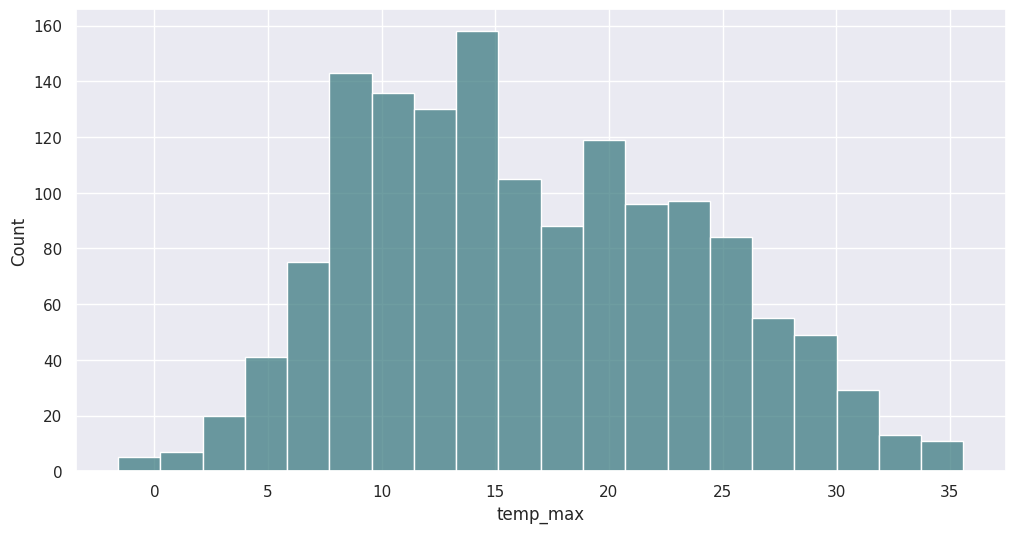

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x=df.temp_max, bins=20, color= "#3e7c82")

<Axes: xlabel='temp_min', ylabel='Count'>

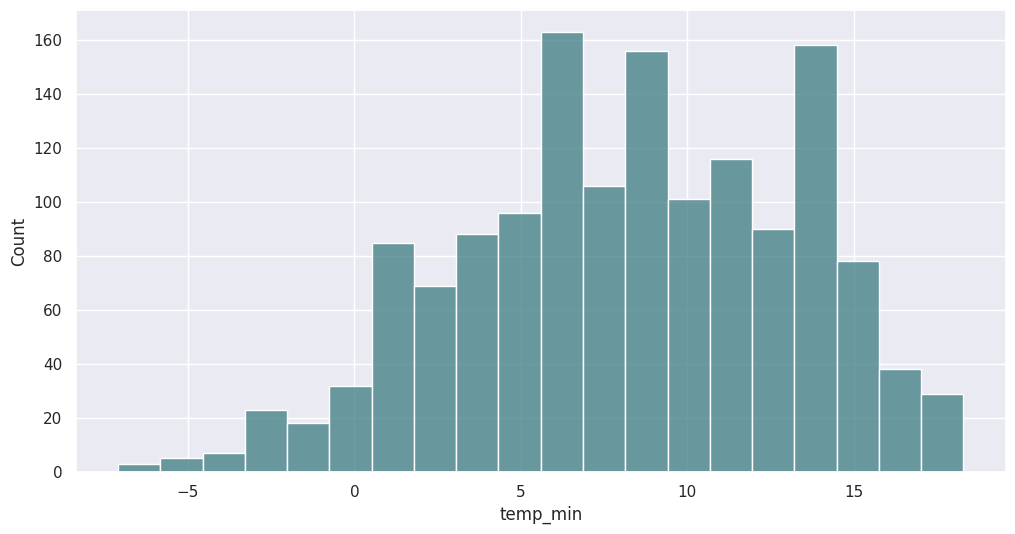

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x=df.temp_min, bins=20, color= "#3e7c82")

<ipython-input-22-981630694e7e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'weather', data = df, palette="crest")


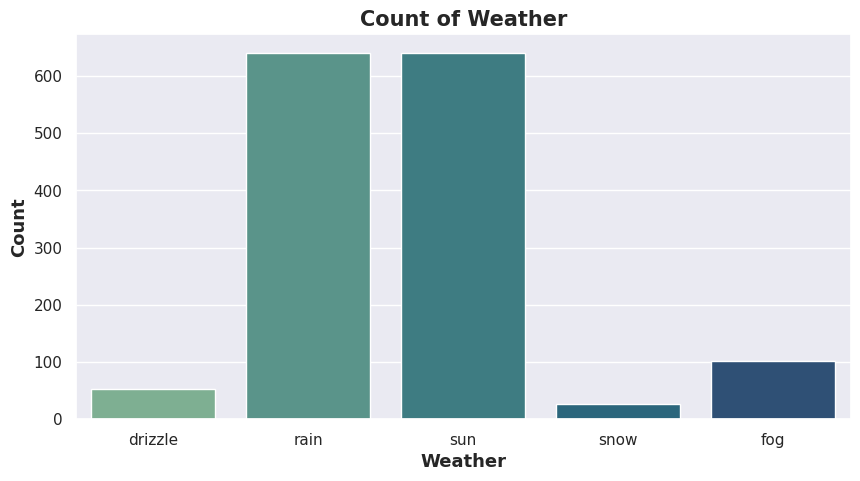

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme()
sns.countplot(x = 'weather', data = df, palette= "crest")
plt.title("Count of Weather",fontweight='bold',size=15)
plt.xlabel("Weather",fontweight='bold',size=13)
plt.ylabel("Count",fontweight='bold',size=13)

plt.show()

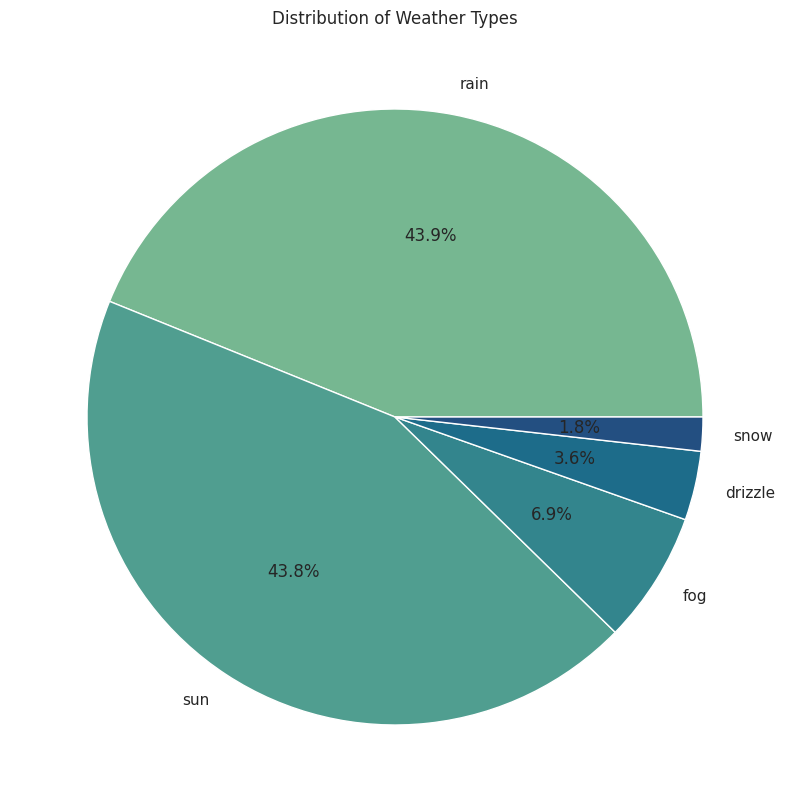

In [ ]:
x=df.weather.value_counts()
colors = sns.color_palette("crest", n_colors=len(x))

plt.figure(figsize=(12, 10))
plt.pie(x, labels=x.index, autopct='%1.1f%%', startangle=0, colors=colors)
plt.title('Distribution of Weather Types')
plt.show()

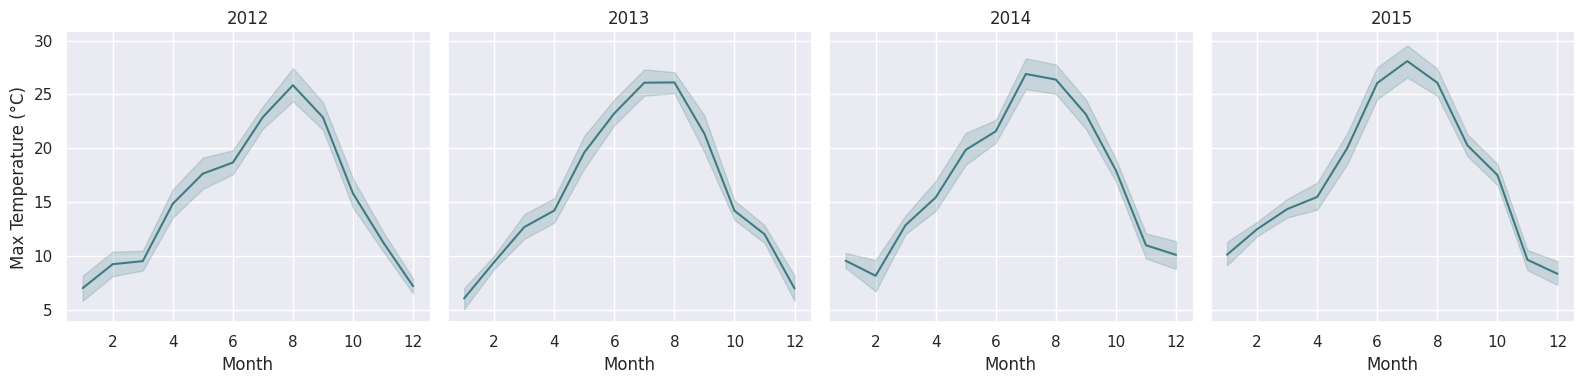

In [ ]:
df['year'] = df.index.year
df['month'] = df.index.month
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'temp_max', color= "#3e7c82")
g.set_axis_labels('Month', 'Max Temperature (°C)')
g.set_titles(col_template="{col_name}")
plt.show()

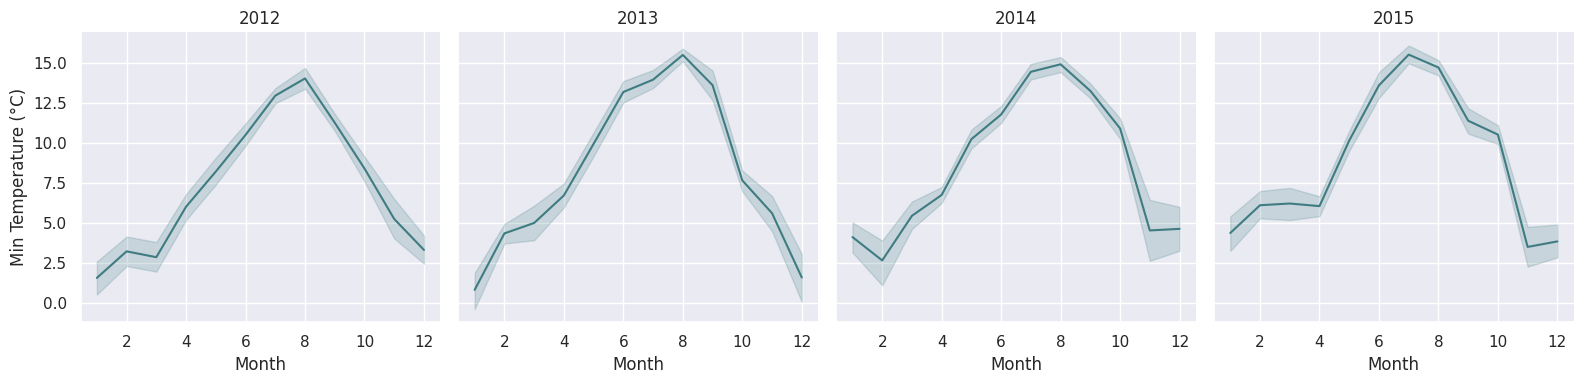

In [ ]:
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.lineplot, 'month', 'temp_min', color= "#3e7c82")
g.set_axis_labels('Month', 'Min Temperature (°C)')
g.set_titles(col_template="{col_name}")
plt.show()

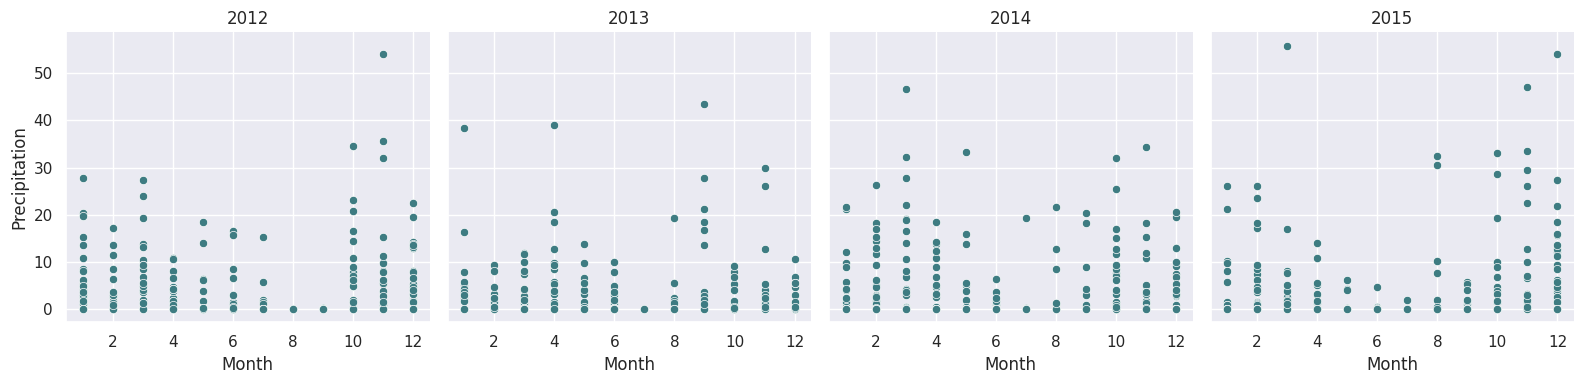

In [ ]:
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.scatterplot, 'month', 'precipitation', color= "#3e7c82")
g.set_axis_labels('Month', 'Precipitation')
g.set_titles(col_template="{col_name}")
plt.show()

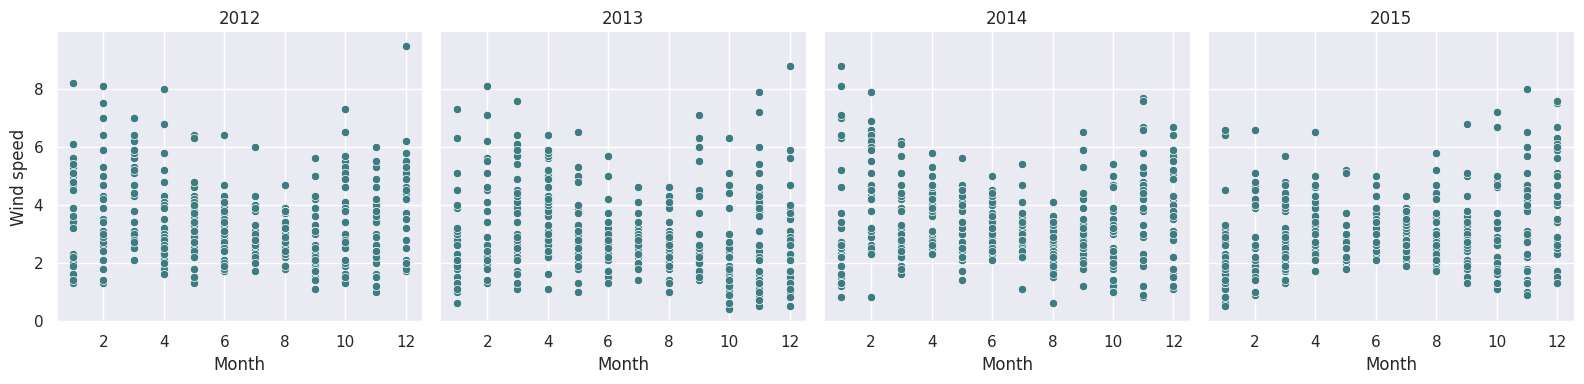

In [ ]:
g = sns.FacetGrid(df, col='year', col_wrap=4, height=4)
g.map(sns.scatterplot, 'month', 'wind', color= "#3e7c82")
g.set_axis_labels('Month', 'Wind speed')
g.set_titles(col_template="{col_name}")
plt.show()

<Figure size 1400x800 with 0 Axes>

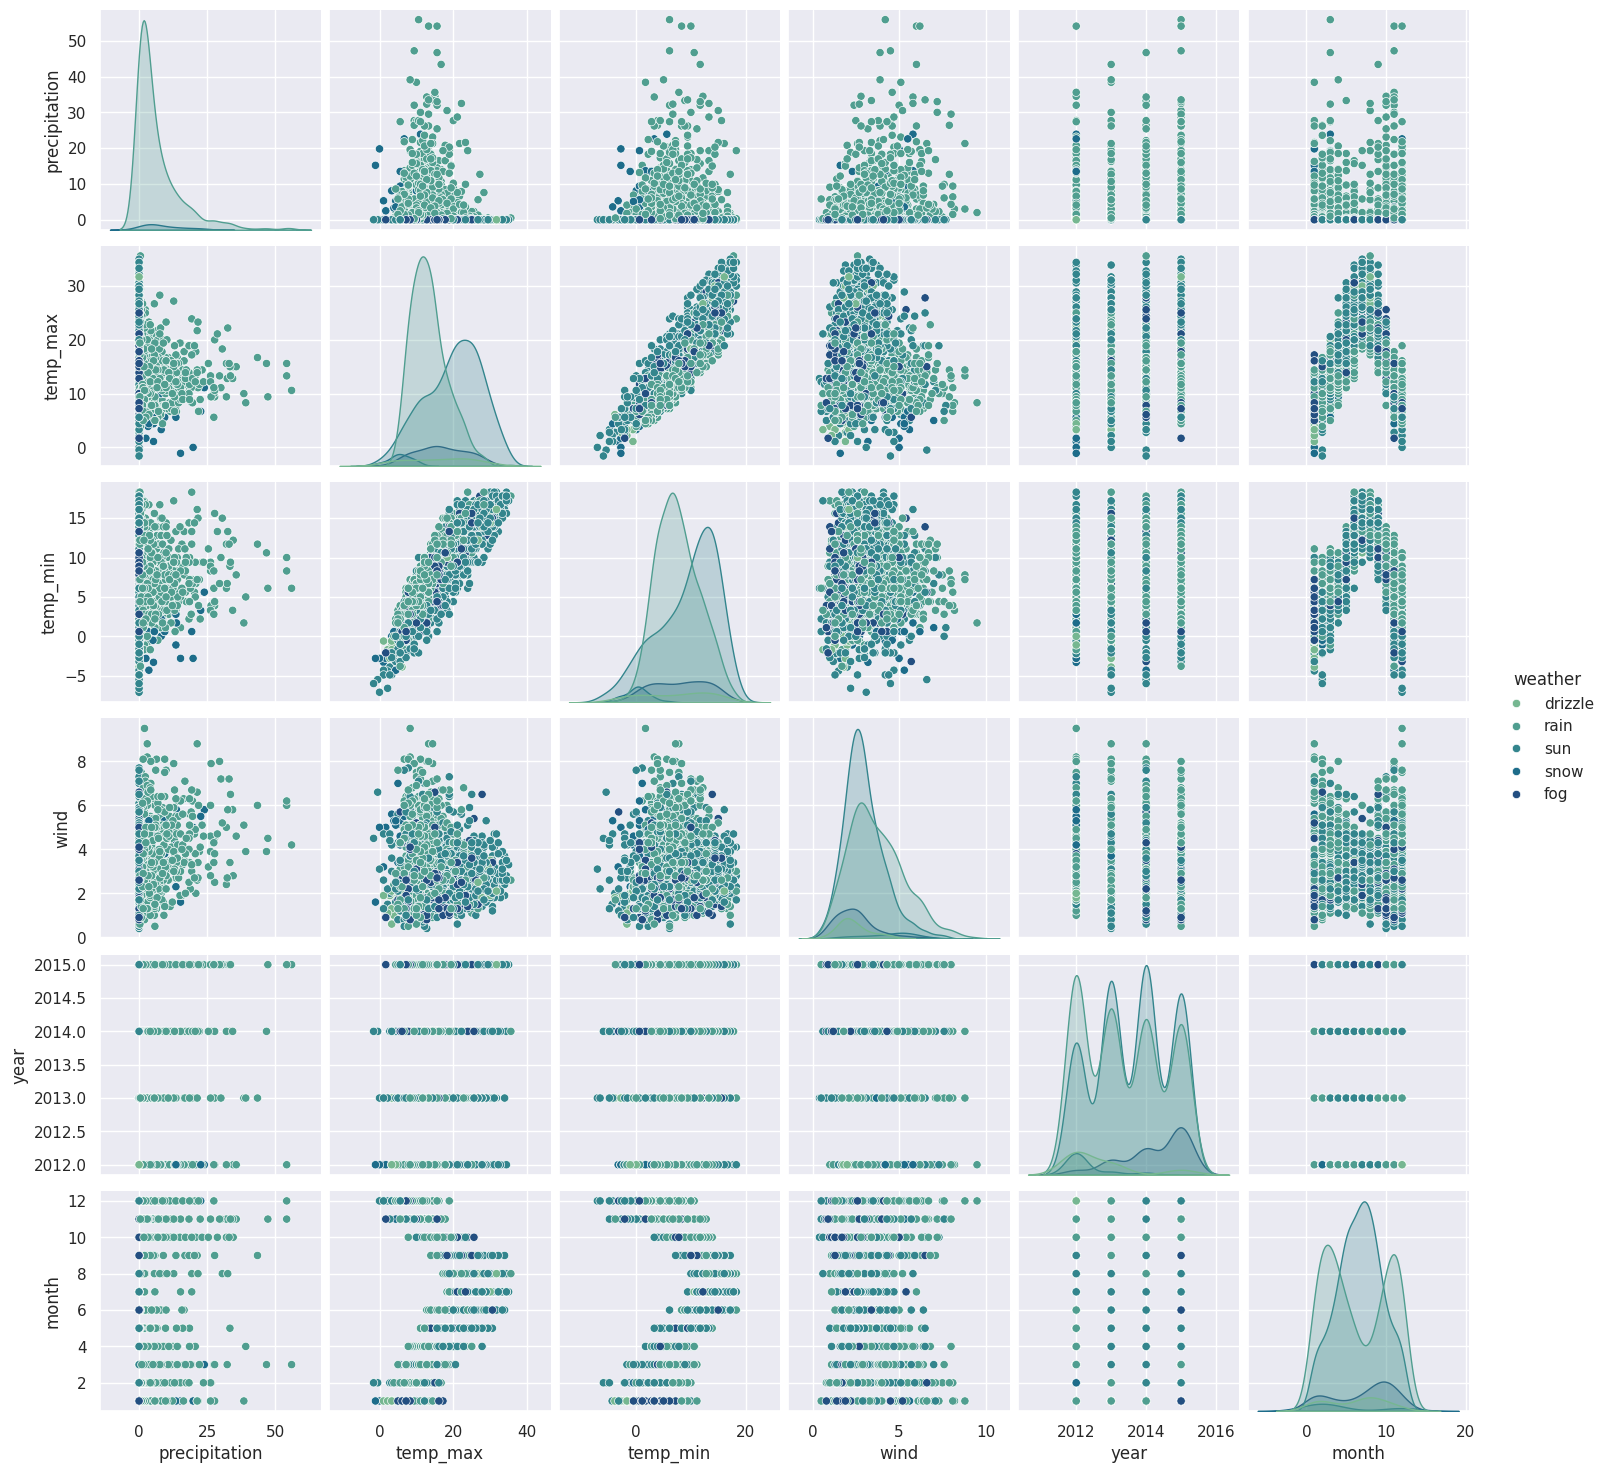

In [ ]:
plt.figure(figsize=(14,8))
sns.pairplot(df, hue='weather', palette="crest")
plt.show()

<ipython-input-52-34e8ea0f2183>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='weather', y ='temp_max', data=df,palette="crest")


<Figure size 1000x500 with 0 Axes>

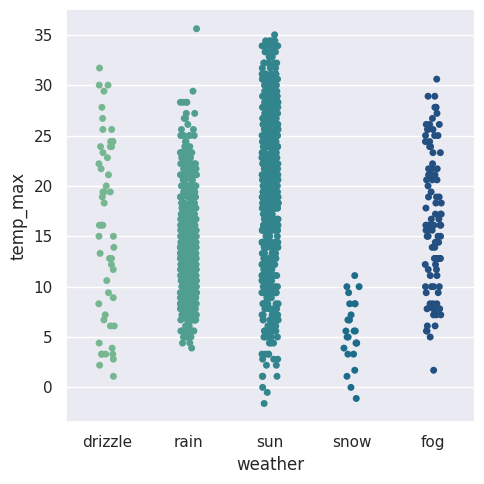

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather', y ='temp_max', data=df,palette="crest")
plt.show()

<ipython-input-53-f8e908088a8c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='weather', y ='temp_min', data=df,palette="crest")


<Figure size 1000x500 with 0 Axes>

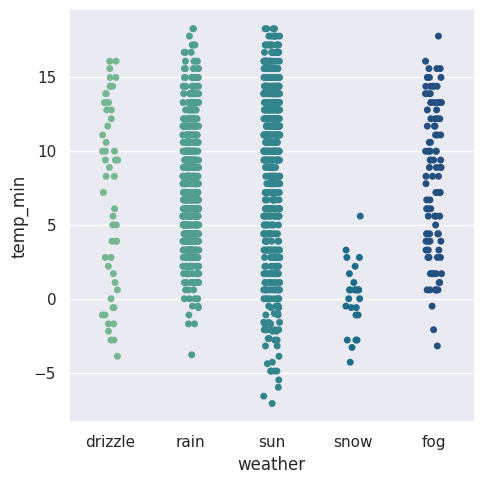

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather', y ='temp_min', data=df,palette="crest")
plt.show()

<ipython-input-54-06caa9c73dac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='weather', y ='wind', data=df,palette="crest")


<Figure size 1000x500 with 0 Axes>

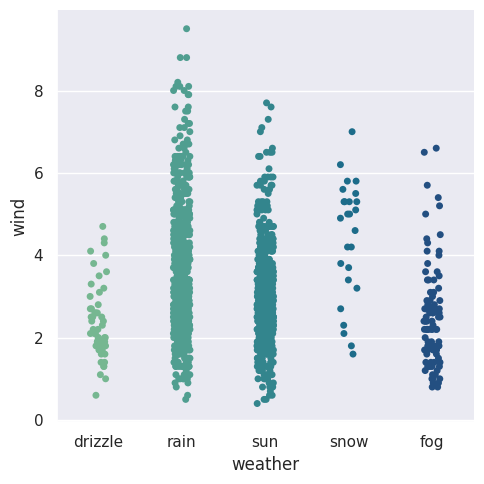

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather', y ='wind', data=df,palette="crest")
plt.show()

<ipython-input-55-8f872c7f4463>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='weather', y ='precipitation', data=df,palette="crest")


<Figure size 1000x500 with 0 Axes>

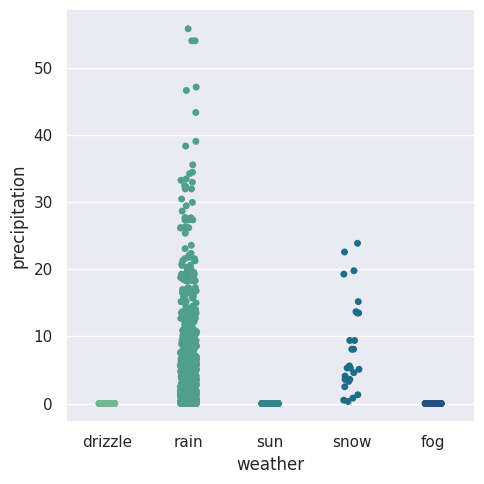

In [ ]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather', y ='precipitation', data=df,palette="crest")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1461 entries, 2012-01-01 to 2015-12-31
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
 5   year           1461 non-null   int32  
 6   month          1461 non-null   int32  
dtypes: float64(4), int32(2), object(1)
memory usage: 112.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['weather']=le.fit_transform(df['weather'])

In [ ]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,year,month
date,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,0,2012,1
2012-01-02,10.9,10.6,2.8,4.5,2,2012,1
2012-01-03,0.8,11.7,7.2,2.3,2,2012,1
2012-01-04,20.3,12.2,5.6,4.7,2,2012,1
2012-01-05,1.3,8.9,2.8,6.1,2,2012,1


In [ ]:
from sklearn.naive_bayes import GaussianNB
x = df[['temp_min', 'temp_max', 'precipitation', 'wind']]
y=df['weather']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=65)

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)
print(f"Accuracy: {accuracy:.2f}")

Confusion Matrix:
[[  0   0   0   0   5]
 [  0   0   0   0  23]
 [  0   0 118   1   8]
 [  0   0   4   6   0]
 [  0   0   0   0 128]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         5
           1       1.00      0.00      0.00        23
           2       0.97      0.93      0.95       127
           3       0.86      0.60      0.71        10
           4       0.78      1.00      0.88       128

    accuracy                           0.86       293
   macro avg       0.92      0.51      0.51       293
weighted avg       0.89      0.86      0.82       293

Accuracy: 0.86


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(max_iter= 1000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

accuracy1 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)
print(f"Accuracy1: {accuracy1:.2f}")

Confusion Matrix:
[[  0   0   0   0   5]
 [  0   0   0   0  23]
 [  0   0 119   0   8]
 [  0   0  10   0   0]
 [  0   0   0   0 128]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         5
           1       1.00      0.00      0.00        23
           2       0.92      0.94      0.93       127
           3       1.00      0.00      0.00        10
           4       0.78      1.00      0.88       128

    accuracy                           0.84       293
   macro avg       0.94      0.39      0.36       293
weighted avg       0.87      0.84      0.79       293

Accuracy1: 0.84


In [ ]:
from sklearn.svm import SVC
svm_model = SVC(kernel= 'linear')
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)
print(f"Accuracy2: {accuracy2:.2f}")

Confusion Matrix:
[[  0   0   0   0   5]
 [  0   0   0   0  23]
 [  0   0 119   0   8]
 [  0   0   9   1   0]
 [  0   0   0   0 128]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         5
           1       1.00      0.00      0.00        23
           2       0.93      0.94      0.93       127
           3       1.00      0.10      0.18        10
           4       0.78      1.00      0.88       128

    accuracy                           0.85       293
   macro avg       0.94      0.41      0.40       293
weighted avg       0.87      0.85      0.79       293

Accuracy2: 0.85


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 1)
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)
print(f"Accuracy3: {accuracy3:.2f}")

Confusion Matrix:
[[  1   0   0   0   4]
 [  2   2   2   0  17]
 [  0   3 102   0  22]
 [  1   0   5   3   1]
 [  4   6   7   0 111]]
Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.20      0.15         5
           1       0.18      0.09      0.12        23
           2       0.88      0.80      0.84       127
           3       1.00      0.30      0.46        10
           4       0.72      0.87      0.78       128

    accuracy                           0.75       293
   macro avg       0.58      0.45      0.47       293
weighted avg       0.74      0.75      0.73       293

Accuracy3: 0.75


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 50)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy4 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)
print(f"Accuracy4: {accuracy4:.2f}")

Confusion Matrix:
[[  0   0   2   0   3]
 [  4   7   0   0  12]
 [  0   1 118   2   6]
 [  0   0   6   4   0]
 [  9  17   8   0  94]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      1.00         5
           1       0.28      0.30      0.29        23
           2       0.88      0.93      0.90       127
           3       0.67      0.40      0.50        10
           4       0.82      0.73      0.77       128

    accuracy                           0.76       293
   macro avg       0.53      0.47      0.69       293
weighted avg       0.78      0.76      0.79       293

Accuracy4: 0.76


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators = 11, criterion = 'entropy', random_state = 50)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy5 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)
print(f"Accuracy5: {accuracy5:.2f}")

Confusion Matrix:
[[  1   0   2   0   2]
 [  2   6   0   0  15]
 [  0   1 119   1   6]
 [  0   0   6   4   0]
 [  3   8   1   0 116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.17      0.20      0.18         5
           1       0.40      0.26      0.32        23
           2       0.93      0.94      0.93       127
           3       0.80      0.40      0.53        10
           4       0.83      0.91      0.87       128

    accuracy                           0.84       293
   macro avg       0.63      0.54      0.57       293
weighted avg       0.83      0.84      0.83       293

Accuracy5: 0.84


In [ ]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

accuracy6 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)
print(f"Accuracy6: {accuracy6:.2f}")

Confusion Matrix:
[[  1   0   2   0   2]
 [  1   4   0   0  18]
 [  0   1 117   2   7]
 [  0   0   4   6   0]
 [  3   9   3   0 113]]
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.20      0.20         5
           1       0.29      0.17      0.22        23
           2       0.93      0.92      0.92       127
           3       0.75      0.60      0.67        10
           4       0.81      0.88      0.84       128

    accuracy                           0.82       293
   macro avg       0.59      0.56      0.57       293
weighted avg       0.81      0.82      0.81       293

Accuracy6: 0.82


In [ ]:
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=40)
nn_model.fit(X_train, y_train)

y_pred = nn_model.predict(X_test)

accuracy7 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, zero_division=1)

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)
print(f"Accuracy7: {accuracy7:.2f}")

Confusion Matrix:
[[  0   0   0   0   5]
 [  0   0   0   0  23]
 [  0   0 118   0   9]
 [  0   0   7   3   0]
 [  0   0   1   0 127]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00         5
           1       1.00      0.00      0.00        23
           2       0.94      0.93      0.93       127
           3       1.00      0.30      0.46        10
           4       0.77      0.99      0.87       128

    accuracy                           0.85       293
   macro avg       0.94      0.44      0.45       293
weighted avg       0.87      0.85      0.80       293

Accuracy7: 0.85


<ipython-input-130-ad56d912b66c>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=mylist2_sorted, y=mylist_sorted, palette = "crest", saturation =1.5)


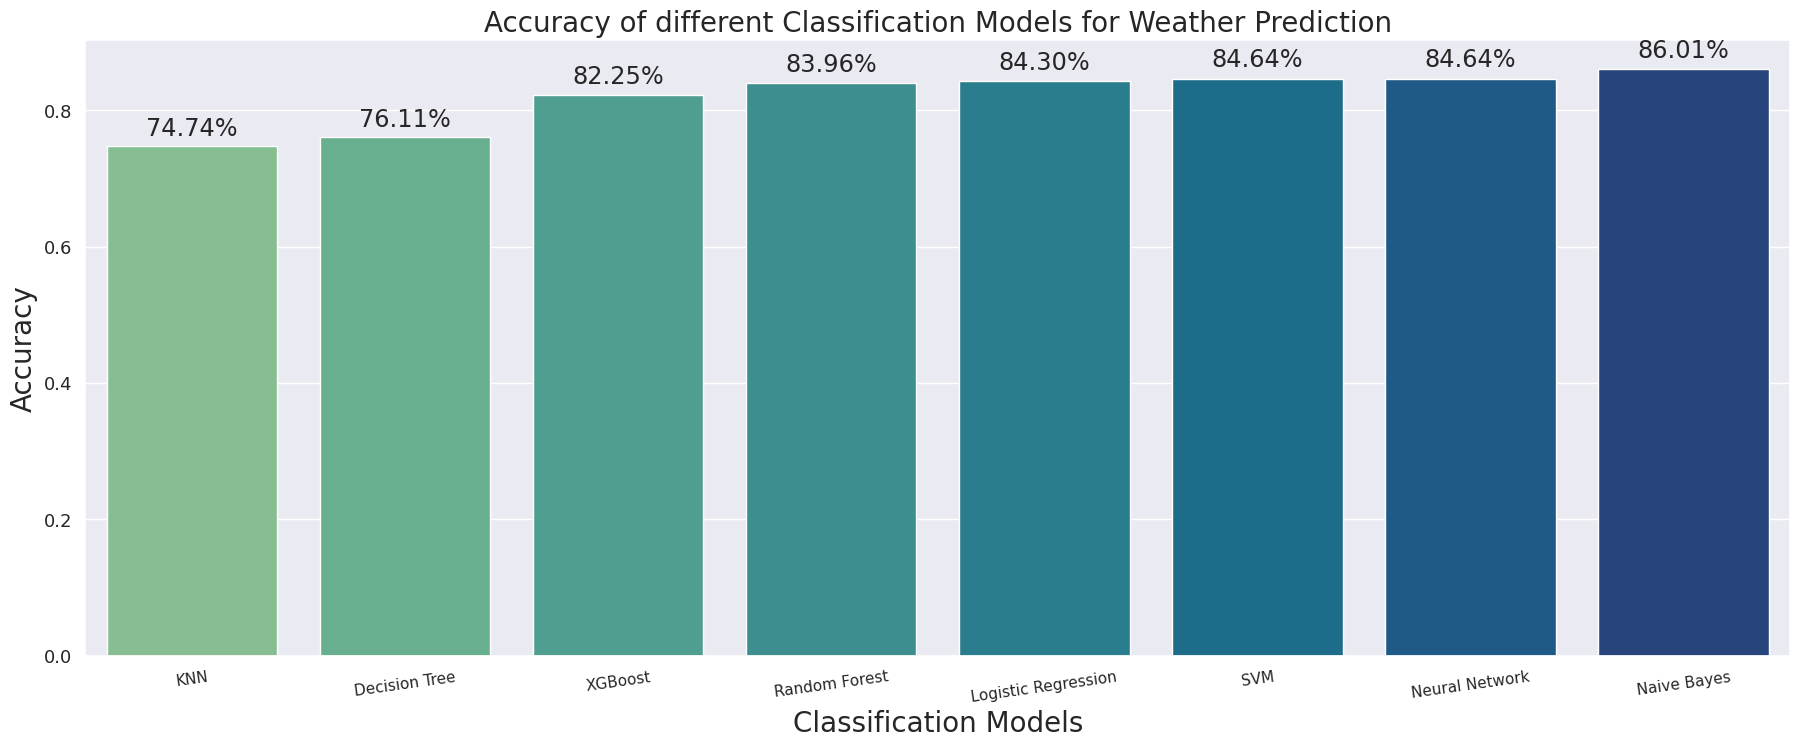

In [ ]:
mylist=[]
mylist2=[]
mylist.append(accuracy)
mylist2.append("Naive Bayes")
mylist.append(accuracy1)
mylist2.append("Logistic Regression")
mylist.append(accuracy2)
mylist2.append("SVM")
mylist.append(accuracy3)
mylist2.append("KNN")
mylist.append(accuracy4)
mylist2.append("Decision Tree")
mylist.append(accuracy5)
mylist2.append("Random Forest")
mylist.append(accuracy6)
mylist2.append("XGBoost")
mylist.append(accuracy7)
mylist2.append("Neural Network")
sorted_data = sorted(zip(mylist2, mylist), key=lambda x: x[1])
mylist2_sorted, mylist_sorted = zip(*sorted_data)
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
plt.figure(figsize=(22,8))
ax = sns.barplot(x=mylist2_sorted, y=mylist_sorted, palette = "crest", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of Different Classification Models for Weather Prediction", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()